In [1]:
import numpy as np
import pandas as pd

import os
print(os.listdir("../input"))

['resources.csv', 'train.csv', 'test.csv', 'sample_submission.csv']


In [2]:
resources = pd.read_csv('../input/resources.csv')
data_train = pd.read_csv('../input/train.csv')
sample_submission = pd.read_csv('../input/sample_submission.csv')

In [3]:
data_train.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1


In [ ]:
# SELECT id, COUNT(description)
# FROM data_train
# INNER JOIN resources ON data_train.id == resources.id


The resources data set is interesting for a number of reasons. I can think of three features that I can create here:
1. The total cost of a project
2. The number of items bought
3. The type of items bought

I intuit that, to first order, the cost of a project would dictate whether a project will go through or not. On the other hand, the quantity might not matter so much; depending on what is bought , the quantity could have a huge range of values. Let's take a look:

In [4]:
projects_summed = resources.groupby(['id'])[['quantity','price']].sum()

In [5]:
import matplotlib.pyplot as plt

Text(0,0.5,'Total price of items')

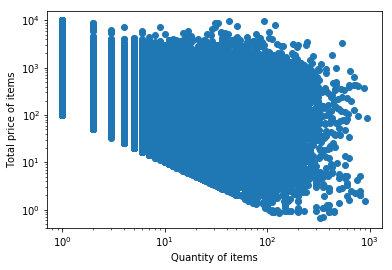

In [6]:
plt.loglog(projects_summed['quantity'],projects_summed['price'],'o')
plt.xlabel('Quantity of items')
plt.ylabel('Total price of items')

It seems like there is a pattern here, but I'd like to normalize the total prices by the number of items asked for to see if there is a different trend.

In [7]:
projects_summed['price_per_item'] = projects_summed.price / projects_summed.quantity

Again, I'll plot to see if there is some pattern to see

Text(0,0.5,'Price per item')

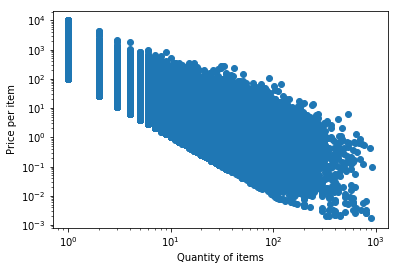

In [8]:
plt.loglog(projects_summed['quantity'],projects_summed['price_per_item'],'o')
plt.xlabel('Quantity of items')
plt.ylabel('Price per item')

Here I'm starting to see an interesting trend. The data seems to be a bit messy, but I think I could clear this up by binning everything and plotting the mean of each bin against the bin.

TODO:
* Bin along the quantity of items
* Find the mean of each bin
* Find the trend in the loglog plot to see if there is a power law